In [1]:
import pandas as pd
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.cluster import AgglomerativeClustering
import pydotplus
import matplotlib.pyplot as plt

In [2]:
#1 dataset <-- transaction.csv, dan tampilkan

dataset = pd.read_csv('transaction.csv')
dataset = pd.DataFrame(dataset)
dataset

,InvoiceNo,StockCode,Qty,InvoiceDate,CustomerID,Country
0,537626,22725,830,12/7/2010 14:57,12347,Iceland
1,537626,22729,948,12/7/2010 14:57,12347,Iceland
2,537626,22195,695,12/7/2010 14:57,12347,Iceland
3,542237,22725,636,1/26/2011 14:30,12347,Iceland
4,542237,22729,536,1/26/2011 14:30,12347,Iceland
...,...,...,...,...,...,...
10541,543911,21700,455,2/14/2011 12:46,17829,United Arab Emirates
10542,543911,22111,578,2/14/2011 12:46,17829,United Arab Emirates
10543,543911,22112,163,2/14/2011 12:46,17829,United Arab Emirates
10544,564428,23296,545,8/25/2011 11:27,17844,Canada


In [3]:
#2 country <-- berapa kemunculan tiap negara pada dataset, dan tampilkan

country = dataset.groupby('Country')['Country'].count().reset_index(name='total')
print('Country\n',country)

Country
                  Country  total
0              Australia    356
1                Austria     88
2                Bahrain      3
3                Belgium    486
4                 Brazil      8
5                 Canada     36
6        Channel Islands    184
7                 Cyprus    113
8         Czech Republic      4
9                Denmark     98
10                  EIRE   1620
11    European Community      5
12               Finland    152
13                France   2109
14               Germany   2269
15                Greece     33
16               Iceland     35
17                Israel     61
18                 Italy    190
19                 Japan     92
20               Lebanon      5
21             Lithuania      8
22                 Malta     15
23           Netherlands    634
24                Norway    239
25                Poland     80
26              Portugal    367
27                   RSA     14
28          Saudi Arabia      1
29             Singapore     45

In [4]:
#3  transaksi <-- hitunglah banyaknya transaksi pada tiap negara (1 kode InvoiceNo =1 transaksi)

transaksi = dataset.groupby('Country')['InvoiceNo'].nunique().reset_index(name='total')
print('Transaction\n',transaksi)

Transaction
                  Country  total
0              Australia     44
1                Austria     12
2                Bahrain      1
3                Belgium     84
4                 Brazil      1
5                 Canada      3
6        Channel Islands     21
7                 Cyprus     16
8         Czech Republic      2
9                Denmark     18
10                  EIRE    224
11    European Community      3
12               Finland     26
13                France    344
14               Germany    377
15                Greece      5
16               Iceland      6
17                Israel      4
18                 Italy     31
19                 Japan     14
20               Lebanon      1
21             Lithuania      2
22                 Malta      2
23           Netherlands     76
24                Norway     28
25                Poland     17
26              Portugal     43
27                   RSA      1
28          Saudi Arabia      1
29             Singapore   

In [5]:
#4  cluster <-- lakukan clustering pada transaksi dengan Average Linkage, dengan k=3

data = pd.DataFrame(columns = ['country', 'transaksi'])

#sumbu X
data['country'] = country.total

#sumbu Y
data['transaksi'] = transaksi.total

clustering = AgglomerativeClustering(n_clusters = 3, linkage = 'average', affinity = 'euclidean')
cluster = clustering.fit_predict(data)
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [6]:
#5 centroid <-- tentukan posisi centroid dari setiap cluster

data['label'] = cluster
centroid = pd.DataFrame(columns = ['X', 'Y'])
for i in data.label.unique():
    centroid.loc[i] = [
        data.loc[data['label'] == i, 'country'].mean(),
        data.loc[data['label'] == i, 'transaksi'].mean()
    ]
centroid

,X,Y
0,137.818182,18.787879
2,1620.000000,224.000000
1,2189.000000,360.500000


In [7]:
#6  sorted <-- lakukan pengurutan posisi centroid secara ascending

data['label'] = cluster
centroid = pd.DataFrame(columns = ['X', 'Y'])
for i in data.label.unique():
    centroid.loc[i] = [
        data.loc[data['label'] == i, 'country'].mean(),
        data.loc[data['label'] == i, 'transaksi'].mean()
    ]
centroid = centroid.sort_values(by = ['X', 'Y'], ascending = True)
centroid

,X,Y
0,137.818182,18.787879
2,1620.000000,224.000000
1,2189.000000,360.500000


In [8]:
#7  Indeks terdepan dari centroid setelah pengurutan, mengindikasikan cluster transanksi rendah. Indeks terakhir dari 
# centroid setelah pengurutan, mengindikasikan cluster transanksi tinggi. Indeks di antaranya, mengindikasikan
# cluster transanksi sedang. Tampilkan negara mana saja yang transaksinya rendah, sedang dan tinggi.

country['label'] = cluster

print('Negara dengan Transaksi Rendah :')
print(country.loc[country['label'] == 0, 'Country'])
print('Negara dengan Transaksi Sedang :')
print(country.loc[country['label'] == 2, 'Country'])
print('Negara dengan Transaksi Tinggi :')
print(country.loc[country['label'] == 1, 'Country'])

Negara dengan Transaksi Rendah :
0                Australia
1                  Austria
2                  Bahrain
3                  Belgium
4                   Brazil
5                   Canada
6          Channel Islands
7                   Cyprus
8           Czech Republic
9                  Denmark
11      European Community
12                 Finland
15                  Greece
16                 Iceland
17                  Israel
18                   Italy
19                   Japan
20                 Lebanon
21               Lithuania
22                   Malta
23             Netherlands
24                  Norway
25                  Poland
26                Portugal
27                     RSA
28            Saudi Arabia
29               Singapore
30                   Spain
31                  Sweden
32             Switzerland
33                     USA
34    United Arab Emirates
35             Unspecified
Name: Country, dtype: object
Negara dengan Transaksi Sedang :
10    EIRE
Nam

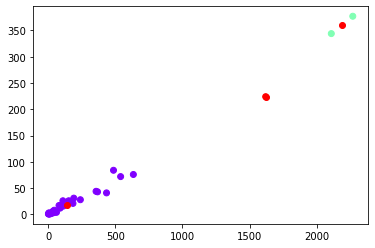

In [9]:
#8 Visualisasi dengan warna yang berbeda untuk hasil cluster (no. 7), dimana sumbu
# x=urutan country dan sumbu y=transaksi

plt.scatter(data.country, data.transaksi, c=cluster, cmap='rainbow')
plt.scatter(centroid.X, centroid.Y, color='red')

plt.show()